In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [31]:
def ratio_cal(dx,dy,size):
    area = (dx*dy)/size
    x = int(np.sqrt(area*(dx/dy)).round())
    y = int(((dy/dx)*x).round())
    return x,y

In [67]:
data = pd.read_csv("../data(S1_Done).csv", index_col=False)
data

,imagePath,label,Shape_num,width,height,point1_x,point1_y,point2_x,point2_y,ascept_ratio,BgMeanR,BgMeanG,BgMeanB
0,3403540,pack,1,2272,4032,926,1682,1248,2284,2.12,169,164,158
1,3403658,can,1,2272,4032,999,1701,1295,2224,1.69,167,162,157
2,3403788,glass,1,4032,2272,1435,972,2672,1185,2.88,169,164,156
3,3403841,paper,1,2268,4032,860,1663,1515,2419,5.42,125,119,113
4,3403871,paper,1,2268,4032,861,1683,1493,2445,5.27,151,146,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12470,custom_00227,vinyl,1,4032,2268,1312,421,2198,1569,11.12,145,137,119
12471,custom_00230,vinyl,1,2268,4032,700,1559,1639,2543,10.10,140,139,135
12472,custom_00285,glass,1,2268,4032,630,2882,1380,3243,2.96,121,123,115
12473,custom_00287,glass,1,2268,4032,621,2878,1372,3240,2.97,120,122,117


In [40]:
def make_points(array):
    x1 = array[5]
    y1 = array[6]
    x2 = array[7]
    y2 = array[8]
    dx = np.abs(x2-x1)
    dy = np.abs(y2-y1)
    image = array[0]
    return x1,y1,x2,y2,dx,dy,image

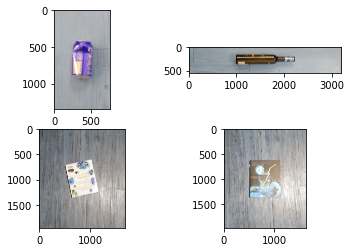

In [64]:
imagePath = "E:/reusable-trash-images/selectstar-reusable-trash-image/"

for i in range(1,5):
    x1,y1,x2,y2,dx,dy,image = make_points(data.values[i])
    dx2, dy2 =ratio_cal(dx,dy,0.15)
    delta_x =int((dx2-dx)/2)
    delta_y =int((dy2-dy)/2)
    pt1_x = x1-delta_x
    pt1_y = y1-delta_y
    pt2_x = x2+delta_x
    pt2_y = y2+delta_y
    path = imagePath + image +".jpg"
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    roi = img[pt1_y:pt2_y,pt1_x:pt2_x]
    plt.subplot(2,2,i)
    plt.imshow(roi)
plt.show()

In [69]:
data[['BgMeanB','BgMeanG','BgMeanR']].describe()

,BgMeanB,BgMeanG,BgMeanR
count,12475.000000,12475.000000,12475.000000
mean,132.531142,142.842084,152.084248
std,31.662098,27.825378,26.485315
min,6.000000,14.000000,13.000000
25%,111.000000,125.000000,137.000000
50%,134.000000,144.000000,153.000000
75%,155.000000,162.000000,169.000000
max,215.000000,218.000000,221.000000


In [70]:
meanB = 133
meanG = 143
meanR = 152


In [99]:
data[
    (data.BgMeanB >= int(meanB*0.8)) & (data.BgMeanB <=int(meanB*1.2))
    &(data.BgMeanG >= int(meanG*0.8)) & (data.BgMeanG <=int(meanG*1.2))
    &(data.BgMeanR >= int(meanR*0.8)) & (data.BgMeanR <=int(meanR*1.2))
    & (data.ascept_ratio >=2) & (data.ascept_ratio <=9)
]['label'].value_counts()

In [101]:

mpe = data[
    (data.BgMeanB >= int(meanB*0.8)) & (data.BgMeanB <=int(meanB*1.2))
    &(data.BgMeanG >= int(meanG*0.8)) & (data.BgMeanG <=int(meanG*1.2))
    &(data.BgMeanR >= int(meanR*0.8)) & (data.BgMeanR <=int(meanR*1.2))
    & (data.ascept_ratio >=2) & (data.ascept_ratio <=9)
]

In [85]:
mpe.to_csv('./mpe.csv', index=False)

In [113]:
data_test = mpe[(mpe['width']!=4032)]
data_test.to_csv("./mpe.csv", index=False)

In [146]:
data= pd.read_csv("./mpe.csv", index_col=False)
# data.to_csv("./mpe.csv", index=False)

### glass 200개
- width가 4000이 넘는 값 5개 제거

In [148]:
glass_df = data[(data['label']=='glass')]
glass_df.to_csv("./glass.csv", index=False)

#### plastic
- 2268사이즈인 -> 500건이상
- 그중 200개만 선택

In [153]:
plastic_df = data[(data['label']=='plastic')&(data['width']==2268)][:200]
plastic_df.to_csv("./plastic.csv", index=False)


#### paper
- 2268인 사이즈 : 512건


In [177]:
paper_df = data[(data['label']=='paper')&(data['width']==2268)&(data['height']==4032)][:200]
paper_df.to_csv("./paper.csv", index=False)

#### vinyl


In [185]:
vinyl_df =data[(data['label']=='vinyl')&(data['width']==2268)&(data['height']==4032)][:200]
vinyl_df.to_csv("./vinyl.csv", index=False)

#### can
- 2268이면서 4032인 이미지 190개
- 2272이면서 4032인 이미지 10개

In [168]:
can_df =data[(data['label']=='can')&(data['width']>=2268)&(data['height']==4032)][:200]
can_df.to_csv("./can.csv", index=False)

#### pack
- 2268이면서 4032인 이미지 208개

In [170]:
pack_df = data[(data['label']=='pack')&(data['width']>=2268)&(data['height']==4032)][:200]
pack_df.to_csv("./pack.csv", index=False)

#### pet
- 2268이면서 4032인 이미지 208개

In [172]:
pet_df = data[(data['label']=='pet')&(data['width']>=2268)&(data['height']==4032)][:200]
pet_df.to_csv("./pack.csv", index=False)

In [188]:

first_df = pd.concat([plastic_df,paper_df,vinyl_df,can_df,pack_df,pet_df,glass_df], axis=0)
first_df.to_csv('./first_df.csv', index=False)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
data = pd.read_csv("./first_df.csv", index_col=False)
data

,imagePath,label,Shape_num,width,height,point1_x,point1_y,point2_x,point2_y,ascept_ratio,BgMeanR,BgMeanG,BgMeanB
0,3404444,plastic,1,2268,4032,778,1572,1433,2255,4.89,157,151,143
1,3404766,plastic,1,2268,4032,980,1742,1446,2422,3.47,145,139,133
2,3404821,plastic,1,2268,4032,750,747,1320,1811,6.63,174,163,152
3,3405529,plastic,1,2268,4032,860,1481,1354,1950,2.53,159,148,139
4,3405720,plastic,1,2268,4032,593,1579,1598,2365,8.64,159,132,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,5107107,glass,1,2268,4032,1133,1480,1465,2318,3.04,138,129,118
1396,5116819,glass,1,2268,4032,920,1786,1600,2602,6.07,128,129,124
1397,5141301,glass,1,3184,5664,1353,2241,2008,3881,5.96,158,154,151
1398,5144286,glass,1,2268,4032,882,1512,1405,2747,7.06,174,165,157


In [3]:
len(data[data['label']=='can'][180:])

20

In [6]:
plastic_train = data[data['label']=='plastic'][:180]
paper_train = data[data['label']=='paper'][:180]
pack_train = data[data['label']=='pack'][:180]
vinyl_train = data[data['label']=='vinyl'][:180]
glass_train = data[data['label']=='glass'][:180]
pet_train = data[data['label']=='pet'][:180]
can_train = data[data['label']=='can'][:180]


plastic_test = data[data['label']=='plastic'][180:]
paper_test = data[data['label']=='paper'][180:]
pack_test = data[data['label']=='pack'][180:]
vinyl_test = data[data['label']=='vinyl'][180:]
glass_test = data[data['label']=='glass'][180:]
pet_test = data[data['label']=='pet'][180:]
can_test = data[data['label']=='can'][180:]

In [13]:
train = pd.concat([plastic_train,paper_train,pack_train,vinyl_train,glass_train,pet_train,can_train], axis=0)
test = pd.concat([plastic_test,paper_test,pack_test,vinyl_test,glass_test,pet_test,can_test], axis=0)

train.to_csv("./train.csv", index=False)
test.to_csv("./test.csv", index=False)